### 生成三组不同均值和方差的高斯分布散点

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

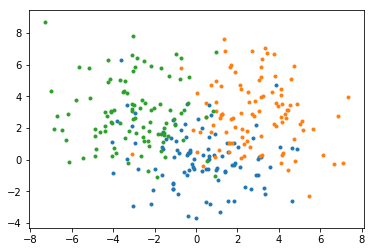

In [6]:
X_raw = np.zeros((2, 300))
for i in range(100):
    X_raw[0, i] = random.gauss(0, 2)
    X_raw[1, i] = random.gauss(0, 2)
for i in range(100, 200):
    X_raw[0, i] = random.gauss(3, 2)
    X_raw[1, i] = random.gauss(3, 2)
for i in range(200, 300):
    X_raw[0, i] = random.gauss(-3, 2)
    X_raw[1, i] = random.gauss(3, 2)
plt.scatter(X_raw[0, 0:100], X_raw[1, 0:100], marker=".")
plt.scatter(X_raw[0, 100:200], X_raw[1, 100:200], marker=".")
plt.scatter(X_raw[0, 200:300], X_raw[1, 200:300], marker=".")
plt.show()

### 划分训练集和测试集

In [19]:
X_train = np.c_[X_raw[0:2, 0:70], X_raw[0:2, 100:170], X_raw[0:2, 200:270]].T
X_test = np.c_[X_raw[0:2, 70:100], X_raw[0:2, 170:200], X_raw[0:2, 270:300]].T

print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))

X_train shape: (210, 2)
X_test shape: (90, 2)


### 使用K-means算法聚类

In [64]:
def kmeans(generation, x):
    c1_center = x[random.randint(0, x.shape[0])]
    c2_center = x[random.randint(0, x.shape[0])]
    c3_center = x[random.randint(0, x.shape[0])]
    
    for i in range(generation):
        c1 = []
        c2 = []
        c3 = []

        for i in range(x.shape[0]):
            current = x[i]
            c1_dis = (current[0] - c1_center[0])**2 + (current[1] - c1_center[1])**2
            c2_dis = (current[0] - c2_center[0])**2 + (current[1] - c2_center[1])**2
            c3_dis = (current[0] - c3_center[0])**2 + (current[1] - c3_center[1])**2
            if (c1_dis <= c2_dis) & (c1_dis <= c3_dis):
                c1.append(current)
            elif (c2_dis <= c1_dis) & (c2_dis <= c3_dis):
                c2.append(current)
            else:
                c3.append(current)

        sumx = 0.0
        sumy = 0.0
        if len(c1) != 0:
            for i in range(len(c1)):
                sumx = sumx + c1[i][0]
                sumy = sumy + c1[i][1]
            c1_center = [sumx / len(c1), sumy / len(c1)]
        
        sumx = 0.0
        sumy = 0.0
        if len(c2) != 0:
            for i in range(len(c2)):
                sumx = sumx + c2[i][0]
                sumy = sumy + c2[i][1]
            c2_center = [sumx / len(c2), sumy / len(c2)]

        sumx = 0.0
        sumy = 0.0
        if len(c3) != 0:
            for i in range(len(c3)):
                sumx = sumx + c3[i][0]
                sumy = sumy + c3[i][1]
            c3_center = [sumx / len(c3), sumy / len(c3)]
    return c1_center, c2_center, c3_center

In [67]:
def draw(c1_center, c2_center, c3_center, x_train, x_test):
    c1 = []
    c2 = []
    c3 = []

    for i in range(x_train.shape[0]):
        current = x_train[i]
        c1_dis = (current[0] - c1_center[0])**2 + (current[1] - c1_center[1])**2
        c2_dis = (current[0] - c2_center[0])**2 + (current[1] - c2_center[1])**2
        c3_dis = (current[0] - c3_center[0])**2 + (current[1] - c3_center[1])**2
        if (c1_dis <= c2_dis) & (c1_dis <= c3_dis):
            c1.append(current)
        elif (c2_dis <= c1_dis) & (c2_dis <= c3_dis):
            c2.append(current)
        else:
            c3.append(current)
            
    for i in range(x_test.shape[0]):
        current = x_test[i]
        c1_dis = (current[0] - c1_center[0])**2 + (current[1] - c1_center[1])**2
        c2_dis = (current[0] - c2_center[0])**2 + (current[1] - c2_center[1])**2
        c3_dis = (current[0] - c3_center[0])**2 + (current[1] - c3_center[1])**2
        if (c1_dis <= c2_dis) & (c1_dis <= c3_dis):
            c1.append(current)
        elif (c2_dis <= c1_dis) & (c2_dis <= c3_dis):
            c2.append(current)
        else:
            c3.append(current)
    
    for i in range(len(c1)):
        plt.scatter(c1[i][0], c1[i][1], marker=".", color="r")
    for i in range(len(c2)):
        plt.scatter(c2[i][0], c2[i][1], marker=".", color="g")
    for i in range(len(c3)):
        plt.scatter(c3[i][0], c3[i][1], marker=".", color="b")    
    plt.scatter(c1_center[0], c1_center[1], marker="^", color="k")
    plt.scatter(c2_center[0], c2_center[1], marker="v", color="k")
    plt.scatter(c3_center[0], c3_center[1], marker="<", color="k")
    plt.show()

In [69]:
def predict(c1_center, c2_center, c3_center, x):
    sum_success = 0.0
    for i in range(0, 30):
        current = x[i]
        c1_dis = (current[0] - c1_center[0])**2 + (current[1] - c1_center[1])**2
        c2_dis = (current[0] - c2_center[0])**2 + (current[1] - c2_center[1])**2
        c3_dis = (current[0] - c3_center[0])**2 + (current[1] - c3_center[1])**2
        if (c1_dis <= c2_dis) & (c1_dis <= c3_dis):
            sum_success = sum_success + 1
    
    for i in range(30, 60):
        current = x[i]
        c1_dis = (current[0] - c1_center[0])**2 + (current[1] - c1_center[1])**2
        c2_dis = (current[0] - c2_center[0])**2 + (current[1] - c2_center[1])**2
        c3_dis = (current[0] - c3_center[0])**2 + (current[1] - c3_center[1])**2
        if (c2_dis <= c1_dis) & (c2_dis <= c3_dis):
            sum_success = sum_success + 1
            
    for i in range(60, 90):
        current = x[i]
        c1_dis = (current[0] - c1_center[0])**2 + (current[1] - c1_center[1])**2
        c2_dis = (current[0] - c2_center[0])**2 + (current[1] - c2_center[1])**2
        c3_dis = (current[0] - c3_center[0])**2 + (current[1] - c3_center[1])**2
        if (c3_dis <= c1_dis) & (c3_dis <= c2_dis):
            sum_success = sum_success + 1
            
    return sum_success / len(x)

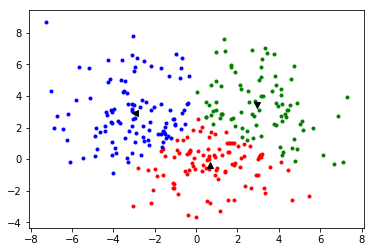

0.8777777777777778


In [72]:
c1_center, c2_center, c3_center = kmeans(5000, X_train)
draw(c1_center, c2_center, c3_center, X_train, X_test)
print(predict(c1_center, c2_center, c3_center, X_test))